<a href="https://colab.research.google.com/github/dnyaneshwar9595/LSTM/blob/main/Colab_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive

# Mount Google Drive to /content/drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("/content/drive/MyDrive/flattened_power_Humidity_temp.csv")

In [33]:
df

,date,time,power,temperature,humidity
0,01-12-2021,00:00:00,465.2900,21.10,92.1
1,01-12-2021,00:15:00,457.4400,21.02,92.4
2,01-12-2021,00:30:00,450.2200,21.02,92.6
3,01-12-2021,00:45:00,441.4000,21.03,92.8
4,01-12-2021,01:00:00,431.8600,20.95,93.1
...,...,...,...,...,...
38011,31-12-2022,22:45:00,366.9478,23.70,68.0
38012,31-12-2022,23:00:00,358.2340,23.50,69.0
38013,31-12-2022,23:15:00,350.4884,23.40,69.0
38014,31-12-2022,23:30:00,342.7428,23.30,67.0


In [34]:
# df.drop(columns=['date','time'], inplace = True)
# scaler = StandardScaler()
# df_trans = scaler.fit_transform(df)
# Extract the last N observations where N is the number of timesteps
# Assuming your LSTM expects 24 timesteps and your data has 3 features
last_observations = df_trans[-24:].reshape(1, 24, 3)

In [35]:
last_observations.shape

(1, 24, 3)

In [36]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

In [37]:
df

,date,time,power,temperature,humidity,datetime
0,01-12-2021,00:00:00,465.2900,21.10,92.1,2021-01-12 00:00:00
1,01-12-2021,00:15:00,457.4400,21.02,92.4,2021-01-12 00:15:00
2,01-12-2021,00:30:00,450.2200,21.02,92.6,2021-01-12 00:30:00
3,01-12-2021,00:45:00,441.4000,21.03,92.8,2021-01-12 00:45:00
4,01-12-2021,01:00:00,431.8600,20.95,93.1,2021-01-12 01:00:00
...,...,...,...,...,...,...
38011,31-12-2022,22:45:00,366.9478,23.70,68.0,2022-12-31 22:45:00
38012,31-12-2022,23:00:00,358.2340,23.50,69.0,2022-12-31 23:00:00
38013,31-12-2022,23:15:00,350.4884,23.40,69.0,2022-12-31 23:15:00
38014,31-12-2022,23:30:00,342.7428,23.30,67.0,2022-12-31 23:30:00


In [38]:
df.drop(columns=['date','time'], inplace = True)

In [39]:
df

,power,temperature,humidity,datetime
0,465.2900,21.10,92.1,2021-01-12 00:00:00
1,457.4400,21.02,92.4,2021-01-12 00:15:00
2,450.2200,21.02,92.6,2021-01-12 00:30:00
3,441.4000,21.03,92.8,2021-01-12 00:45:00
4,431.8600,20.95,93.1,2021-01-12 01:00:00
...,...,...,...,...
38011,366.9478,23.70,68.0,2022-12-31 22:45:00
38012,358.2340,23.50,69.0,2022-12-31 23:00:00
38013,350.4884,23.40,69.0,2022-12-31 23:15:00
38014,342.7428,23.30,67.0,2022-12-31 23:30:00


In [40]:
df = df[['datetime', 'power', 'temperature', 'humidity']]

In [41]:
df

,datetime,power,temperature,humidity
0,2021-01-12 00:00:00,465.2900,21.10,92.1
1,2021-01-12 00:15:00,457.4400,21.02,92.4
2,2021-01-12 00:30:00,450.2200,21.02,92.6
3,2021-01-12 00:45:00,441.4000,21.03,92.8
4,2021-01-12 01:00:00,431.8600,20.95,93.1
...,...,...,...,...
38011,2022-12-31 22:45:00,366.9478,23.70,68.0
38012,2022-12-31 23:00:00,358.2340,23.50,69.0
38013,2022-12-31 23:15:00,350.4884,23.40,69.0
38014,2022-12-31 23:30:00,342.7428,23.30,67.0


In [42]:
cols = list(df)[1:4]

In [43]:
cols

['power', 'temperature', 'humidity']

In [44]:
df_train = df[cols].astype(float)

In [45]:
scaler = StandardScaler()
df_trans = scaler.fit_transform(df_train)

In [46]:
df_trans.shape

(38016, 3)

In [47]:
df_trans[0:10,:].shape

(10, 3)

In [48]:
def create_data(df_trans,window_length,n_future):
  x,y=[],[]
  for i in range(len(df_trans) - window_length - n_future):
    x.append(df_trans[i:i+window_length])
    y.append(df_trans[i+window_length:i+window_length + n_future,0])
  return np.array(x), np.array(y)

In [49]:
window_length = 24
n_future = 24
train_x, train_y = create_data(df_trans, window_length, n_future)

In [50]:
train_y.shape

(37968, 24)

In [51]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(window_length, 3)))
model.add(Dense(train_y.shape[1]))  # Output layer with 24 units
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17408     
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
Total params: 18968 (74.09 KB)
Trainable params: 18968 (74.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
# Train the LSTM model
history = model.fit(train_x, train_y, epochs=1, validation_split=0.1)

1068/1068 [==============================] - 19s 16ms/step - loss: 0.2248 - val_loss: 0.1013


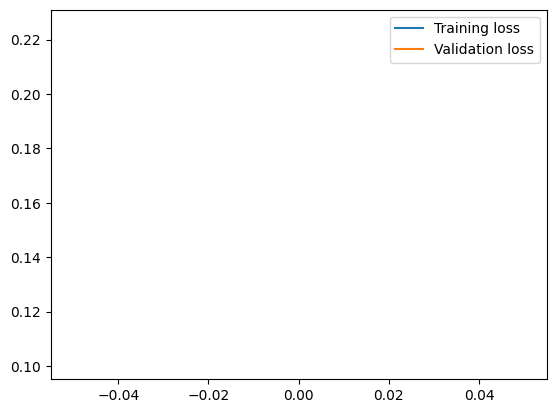

In [53]:
plt.plot(history.history['loss'], label = 'Training loss' )
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.legend()
plt.show()

In [54]:
train_data = df['datetime']

In [55]:
predicted_power = model.predict(train_x[-1:])

1/1 [==============================] - 0s 361ms/step


In [56]:
# Assuming predicted_power is shaped (24, ) or (1, 24) since you're predicting 24 points.
# Reshape or adjust it to have a shape of (-1, 1) if necessary
predicted_power = predicted_power.reshape(-1, 1)

# Create a dummy array with zeros to match the shape required for inverse_transform
dummy_features = np.zeros((predicted_power.shape[0], df_train.shape[1] - 1))

# Combine the predicted values with dummy features
predicted_combined = np.hstack([predicted_power, dummy_features])

# Apply inverse_transform
predicted_original = scaler.inverse_transform(predicted_combined)

# Extract the power consumption predictions from the transformed array
predicted_power_original = predicted_original[:, 0]  # Assuming power consumption is the first feature


In [57]:
predicted_power_original

array([486.19645961, 475.34368406, 455.5531223 , 474.4201445 ,
       467.43738989, 456.80306372, 458.57275811, 457.68128188,
       443.60024913, 458.91788365, 450.06726743, 439.66799721,
       444.19404608, 443.53900484, 442.71004316, 447.12374997,
       436.63943075, 437.58727613, 441.22178273, 432.10994014,
       416.4118304 , 428.37438782, 434.56153764, 431.8895912 ])

In [58]:
n_futures = train_y.shape[1]
period = pd.date_range(list(train_data)[-1],periods=n_futures, freq = '15T')

In [59]:
period.shape

(24,)

In [60]:
train_y.shape[1]

24

In [61]:
# Ensure predicted_power_original is a numpy array or a list
# If it's not already, you can convert it like this:
# predicted_power_original = predicted_power_original.flatten() or .ravel() if it's multi-dimensional

# Create a DataFrame with the period as the index and the predicted values as a column
df_forecast = pd.DataFrame(data=predicted_power_original, index=period, columns=['Predicted Power'])

In [62]:
df_forecast.shape

(24, 1)

In [63]:
from tensorflow.keras.models import load_model

# Assume your model is named `model`
model.save('path_to_save_your_model.h5')  # Specify the path and filename


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [64]:
import joblib

# Assume your scaler is named `scaler`
joblib.dump(scaler, '/content/drive/MyDrive/dk.pkl')  # Specify the path and filename


['/content/drive/MyDrive/dk.pkl']